In [1]:
import glob
import os
import pandas as pd

data_dir = '/nobackup/gogandhi/alt_means_sans_k/data/dog_breed_data'

list_imgs = glob.glob(data_dir + "/**/*.jpg")
print(f"There are {len(list_imgs)} images in the dataset {data_dir}")

# Create a list to store community IDs
community_ids = []

# Create a list to store breed names
breeds = []

# Extract community ID and breed from folder structure
for img_path in list_imgs:
    community_id = os.path.basename(os.path.dirname(img_path))
    breed = os.path.basename(img_path)  # Assuming the breed is the image file name
    community_ids.append(community_id)
    breeds.append(breed)

# Create a DataFrame
community_table = pd.DataFrame({'image_path': list_imgs, 'community_id': community_ids, 'breed': breeds})

# Enumerate community_id
community_table['community_id'] = community_table['community_id'].astype('category').cat.codes

# Print information about the dataset
print(f"There are {len(list_imgs)} images in the dataset {data_dir}")
print(f"There are {community_table['community_id'].nunique()} unique communities.")

# Display the DataFrame
print(community_table.head())

There are 918 images in the dataset /nobackup/gogandhi/alt_means_sans_k/data/dog_breed_data
There are 918 images in the dataset /nobackup/gogandhi/alt_means_sans_k/data/dog_breed_data
There are 10 unique communities.
                                          image_path  community_id  \
0  /nobackup/gogandhi/alt_means_sans_k/data/dog_b...             0   
1  /nobackup/gogandhi/alt_means_sans_k/data/dog_b...             0   
2  /nobackup/gogandhi/alt_means_sans_k/data/dog_b...             0   
3  /nobackup/gogandhi/alt_means_sans_k/data/dog_b...             0   
4  /nobackup/gogandhi/alt_means_sans_k/data/dog_b...             0   

            breed  
0    bernese1.jpg  
1   bernese10.jpg  
2  bernese100.jpg  
3   bernese15.jpg  
4   bernese16.jpg  


In [2]:
from torchvision import datasets, transforms
import torch
import numpy as np
import matplotlib.pyplot as plt

# create dataloader with required transforms 
tc = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor()              
    ])

image_datasets = datasets.ImageFolder(data_dir, transform=tc)
dloader = torch.utils.data.DataLoader(image_datasets, batch_size=10, shuffle=False)

print(len(image_datasets)) # returns 918

918


torch.Size([256, 256, 3])
tensor([[[0.9608, 0.9608, 0.9608,  ..., 0.8275, 0.8353, 0.8039],
         [0.9608, 0.9608, 0.9608,  ..., 0.8471, 0.8392, 0.8118],
         [0.9608, 0.9608, 0.9569,  ..., 0.8471, 0.8392, 0.8118],
         ...,
         [0.6667, 0.6980, 0.6667,  ..., 0.7569, 0.7922, 0.7961],
         [0.7294, 0.7451, 0.7137,  ..., 0.7843, 0.7647, 0.7725],
         [0.7490, 0.7490, 0.7647,  ..., 0.8235, 0.8353, 0.8392]],

        [[0.9647, 0.9647, 0.9647,  ..., 0.8431, 0.8471, 0.8118],
         [0.9647, 0.9647, 0.9647,  ..., 0.8549, 0.8471, 0.8157],
         [0.9647, 0.9647, 0.9608,  ..., 0.8431, 0.8431, 0.8196],
         ...,
         [0.6784, 0.7137, 0.6824,  ..., 0.7569, 0.7882, 0.7922],
         [0.7373, 0.7647, 0.7333,  ..., 0.7804, 0.7608, 0.7686],
         [0.7608, 0.7686, 0.7882,  ..., 0.8235, 0.8314, 0.8353]],

        [[0.9804, 0.9804, 0.9804,  ..., 0.8275, 0.8314, 0.8000],
         [0.9804, 0.9804, 0.9804,  ..., 0.8627, 0.8510, 0.8196],
         [0.9804, 0.9804, 0.9765

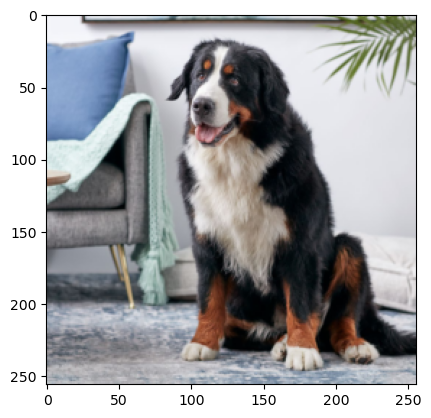

In [3]:
i=0
for img, label in dloader:
      print(np.transpose(img[0], (1,2,0)).shape)
      print(img[i])
      plt.imshow((img[i].detach().numpy().transpose(1, 2, 0)*255).astype(np.uint8))
      plt.show()
      i = i + 1
      break

In [4]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)


Using cache found in /u/gogandhi/.cache/torch/hub/pytorch_vision_v0.10.0
/nobackup/gogandhi/miniconda3/envs/kmeans_env/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/nobackup/gogandhi/miniconda3/envs/kmeans_env/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [5]:
layer = model._modules.get('avgpool')

In [6]:
def copy_embeddings(m, i, o):
    """Copy embeddings from the penultimate layer.
    """
    o = o[:, :, 0, 0].detach().numpy().tolist()
    outputs.append(o)

outputs = []
# attach hook to the penulimate layer
_ = layer.register_forward_hook(copy_embeddings)
model.eval() # Inference mode


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [7]:
# Generate image's embeddings for all images in dloader and saves 
# them in the list outputs
for X, y in dloader:
    _ = model(X)
print(len(outputs)) #

92


In [8]:
embeddings = [item for sublist in outputs for item in sublist]

In [9]:
print(len(embeddings)) # returns 918
print(len(embeddings[0]))

918
512


/nobackup/gogandhi/miniconda3/envs/kmeans_env/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


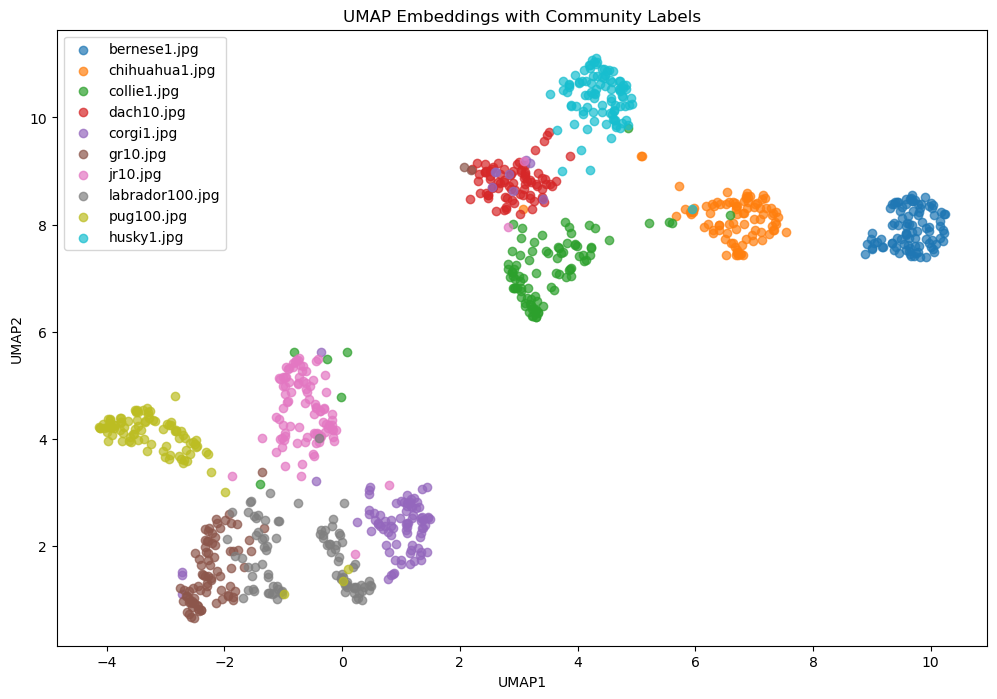

In [11]:
import umap
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame named community_table with "community_id" column
# and list of embeddings named embeddings (each 512 dimensions)

# Load your embeddings (replace this with your actual embedding data)
# embeddings = ...

# Use UMAP to reduce dimensionality to 2D
reducer = umap.UMAP(random_state=40)
umap_embeddings = reducer.fit_transform(embeddings)

# Add community labels to the UMAP embeddings DataFrame
umap_df = pd.DataFrame(umap_embeddings, columns=['UMAP1', 'UMAP2'])
umap_df['community_id'] = community_table['community_id']
umap_df['breed'] = community_table['breed']

# Plot using Matplotlib
plt.figure(figsize=(12, 8))
for community_id in umap_df['community_id'].unique():
    subset_df = umap_df[umap_df['community_id'] == community_id]
    plt.scatter(subset_df['UMAP1'], subset_df['UMAP2'], label=f'{subset_df["breed"].iloc[0]}', alpha=0.7)

plt.title('UMAP Embeddings with Community Labels')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend()
plt.show()


## OKay let's compare the algorithms against this

In [12]:
import numpy as np
from scipy import sparse
import pandas as pd
#import os
#import networkx as nx
#import gensim
#import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.cluster import OPTICS, DBSCAN
from sklearn.linear_model import LogisticRegression 
import faiss
import fast_hdbscan
#import lfr
#import embcom
#import csv
import sys
sys.path.append("/nobackup/gogandhi/alt_means_sans_k/")

from scripts.nets_and_embeddings import create_and_save_network_and_embedding
#from scripts.clustering_methods import clustering_method_values

from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.xmeans import xmeans, splitting_type
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import FCPS_SAMPLES
import numpy as np
import belief_propagation
import infomap
from graph_tool.all import Graph,minimize_blockmodel_dl

In [25]:
# Define a function that calculates element-centric similarity:
def calc_esim(y, ypred):

    ylab, y = np.unique(y, return_inverse=True)
    ypredlab, ypred = np.unique(ypred, return_inverse=True)
    
    Ka, Kb = len(ylab), len(ypredlab)
    K = np.maximum(Ka, Kb)
    N = len(y)
    
    UA = sparse.csr_matrix((np.ones_like(y), (np.arange(y.size), y)), shape=(N,K))
    UB = sparse.csr_matrix((np.ones_like(ypred), (np.arange(ypred.size), ypred)), shape=(N, K))    
    
    nA = np.array(UA.sum(axis=0)).reshape(-1)
    nB = np.array(UB.sum(axis=0)).reshape(-1)

# nAB[i][j] is read as the number of elements that belong to ith ground truth label and jth predicrted label.
# nAB[1][0] = 1 For ground truth label with index 1 and predicted label 0 we have 1 element. i.e. 0000|1| vs 1110|0|

    nAB = (UA.T @ UB).toarray()
    nAB_rand = np.outer(nA, nB) / N
    
# assuming that each element has an equal probability of being assigned to any label,
# and the expected counts are calculated based on label frequencies.


    # Calc element-centric similarity
    Q = np.maximum(nA[:, None] @ np.ones((1, K)), np.ones((K, 1)) @ nB[None, :]) 
    Q = 1 / np.maximum(Q, 1)
    S = np.sum(np.multiply(Q, (nAB**2))) / N
    
    # Calc the expected element-centric similarity for random partitions
    #Q = np.maximum(nA[:, None] @ np.ones((1, K)), np.ones((K, 1)) @ nB[None, :]) 
    #Q = 1 / np.maximum(Q, 1)
    Srand = np.sum(np.multiply(Q, (nAB_rand**2))) / N
    Scorrected = (S - Srand) / (1 - Srand)
    return Scorrected

def find_knn_edges(emb, num_neighbors, 
                   target=None, metric="dotsim",
                   device=None):
    
    k = int(np.minimum(num_neighbors + 1, emb.shape[0]).astype(int))
    indices, distances = find_knn(emb if target is None else target, emb,
                                  num_neighbors=k,
                                  metric=metric,
                                  device=device)
    r = np.outer(np.arange(indices.shape[0]), np.ones((1, indices.shape[1]))).astype(int)
    r, c, distances = (r.reshape(-1),indices.astype(int).reshape(-1),distances.reshape(-1))
    if len(r) == 0:
        return r, c, distances 
    
    return r, c, distances

# Only place where GPU is used, need to handle its closing. 
def find_knn(target, emb, num_neighbors, metric="dotsim", device=None): 
    if metric == "dotsim":
        index = faiss.IndexFlatIP(emb.shape[1]) 
    elif metric == "euclidean":
        index = faiss.IndexFlatL2(emb.shape[1])
    elif metric == "manhattan":
        index = faiss.IndexFlatL1(emb.shape[1])
    elif metric == "cosine":
        index = faiss.IndexFlatIP(emb.shape[1])
        emb = emb / np.linalg.norm(emb, axis=1, keepdims=True)
    elif metric=="mahalanobis":
        # THis mathematical trick works, but it needs some reworking in target.astype to
        # give right results.
        # map the vectors back to a space where they follow a unit Gaussian
        xc = emb - emb.mean(0)
        cov = np.dot(xc.T, xc) / xc.shape[0]
        L = np.linalg.cholesky(cov)
        mahalanobis_transform = np.linalg.inv(L)
        emb = np.dot(emb, mahalanobis_transform.T)
        index = faiss.IndexFlatL2(emb.shape[1])
    else:
        raise ValueError("Invalid metric specified.")
    
    if device is None:
        index.add(emb.astype(np.float32))
        distances, indices = index.search(target.astype(np.float32), k=num_neighbors)
        # This line takes too long to load.
    else: 
        try:
            gpu_id = int(device[-1])
            res = faiss.StandardGpuResources()
            index = faiss.index_cpu_to_gpu(res, gpu_id, index)
            index.add(emb.astype(np.float32))
            distances, indices = index.search(
                target.astype(np.float32), k=num_neighbors
            )
        except RuntimeError:
            if metric == "dotsim":
                index = faiss.IndexFlatIP(emb.shape[1]) 
            elif metric == "euclidean":
                index = faiss.IndexFlatL2(emb.shape[1])
            elif metric == "manhattan":
                index = faiss.IndexFlatL1(emb.shape[1])
            elif metric == "cosine":
                index = faiss.IndexFlatIP(emb.shape[1])
                emb = emb / np.linalg.norm(emb, axis=1, keepdims=True)
            else:
                raise ValueError("Invalid metric specified.")
            
            index.add(emb.astype(np.float32))
            distances, indices = index.search(target.astype(np.float32),
                                              k=num_neighbors)
        
    index.reset()
    return indices, distances

import numba

def louvain(Z, w1, b0, num_neighbors=10, iteration = 50, device = "cuda:0", return_member_matrix=False):
    """"Louvain algorithm for vecto data
    :param Z: embedding
    :type Z: numpy.ndarray
    :param w1: regression coefficient
    :type w1: float
    :param b0: intercept
    :type b0: float
    :param num_neighbors: Number of neighbors, defaults to 100
    :type num_neighbors: int, optional
    :param iteration: The maximum number of iterations, defaults to 50
    :type iteration: int, optional
    :param device: _description_, defaults to "cuda:0"
    :type device: str, optional
    :param return_member_matrix: _description_, defaults to False
    :type return_member_matrix: bool, optional
    :return: _description_
    :rtype: _type_
    """
    # Initialize the intermediate variables
    num_nodes = Z.shape[0]
    node_size = np.ones(num_nodes)
    U = sparse.identity(num_nodes, format="csr")
    Vt = Z.copy()
    
    # The main loop for the Louvain algorithm
    while True:
        # Find the community assignment for the given graph # using a label switching algorithm
        cids_t = label_switching(
               Z=Vt,
               num_neighbors=num_neighbors,
               rho=b0/w1,
               node_size=node_size,
               epochs=iteration,
               device=device,
                )
        
        # This is to make the community labels continuous integer variables
        _, cids_t = np.unique(cids_t, return_inverse=True)
        
        # If no merging, we are good to go out from the loop
        if int(max(cids_t) + 1) == Vt.shape[0]: 
            break
            
        # If two nodes are merged, we created an aggregated network, 
        #where a node represents a community.
        
        num_nodes_t = len(cids_t)
        k = int(np.max(cids_t) + 1)
        Ut = sparse.csr_matrix((np.ones(num_nodes_t), (np.arange(num_nodes_t), cids_t)), shape=(num_nodes_t, k))
        U = U @ Ut
        Vt = Ut.T @ Vt
        
        node_size = np.array(Ut.T @ node_size).reshape(-1)
    if return_member_matrix: 
        return U
    cids = np.array((U @ sparse.diags(np.arange(U.shape[1]))).sum(axis=1)).reshape(-1)

    return cids

#
# Clustering based on a label switching algorithm
#
def label_switching(Z, rho, num_neighbors=150, node_size=None, device=None,epochs=50): # This involves distance metrics (cosine similarity, atm)
    num_nodes, dim = Z.shape
    if node_size is None:
        node_size = np.ones(num_nodes)
    Z = Z.copy(order="C").astype(np.float32)
    # Construct the candidate graph
    Z1 = np.hstack([Z, np.ones((num_nodes, 1))])
    Zrho = np.hstack([Z, -rho * node_size.reshape((-1, 1))])

    r, c, v = find_knn_edges(
        Zrho,
        target=Z1,
        num_neighbors=num_neighbors,
        metric="cosine",
        device=device)
    A = sparse.csr_matrix((v, (r, c)), shape=(num_nodes, num_nodes))
    
    return _label_switching_(
        A_indptr=A.indptr,
        A_indices=A.indices,
        Z=Z,
        num_nodes=num_nodes,
        rho=rho,
        node_size=node_size,
        epochs=epochs)

#@numba.jit(nopython=True, cache=True)
def _label_switching_(A_indptr, A_indices, Z, num_nodes, rho, node_size,epochs=100):
    Nc = np.zeros(num_nodes)
    cids = np.arange(num_nodes)
    Vc = Z.copy()
    Vnorm = np.sum(np.multiply(Z, Z), axis=1).reshape(-1) 
    for nid in range(num_nodes):
            Nc[nid] += node_size[nid]
    for _it in range(epochs):
        order = np.random.choice(num_nodes, size=num_nodes, replace=False) 
        updated_node_num = 0
        
        for _k, node_id in enumerate(order):
            # Get the weight and normalized weight
            neighbors = A_indices[A_indptr[node_id] : A_indptr[node_id + 1]]

            # Calculate the grain
            c = cids[node_id]
            clist = np.unique(cids[neighbors])
            next_cid = -1
            dqmax = 0
            qself = (
                np.sum(Z[node_id, :] * Vc[c, :])
                - Vnorm[node_id]
                - rho * node_size[node_id] * (Nc[c] - node_size[node_id]))

            for cprime in clist:
                if c == cprime: 
                    continue
                dq = (np.sum(Z[node_id, :] * Vc[cprime, :])
                        - rho * node_size[node_id] * Nc[cprime]) - qself
                if dqmax < dq:
                    next_cid = cprime
                    dqmax = dq
            if dqmax <= 1e-16: 
                continue

            Nc[c] -= node_size[node_id]
            Nc[next_cid] += node_size[node_id]

            Vc[c, :] -= Z[node_id, :]
            Vc[next_cid, :] += Z[node_id, :]

            cids[node_id] = next_cid
            updated_node_num += 1

        if (updated_node_num / np.maximum(1, num_nodes)) < 1e-3: 
            break
    return cids
 

    # Evaluate the clustering
def clustering_method_values(net, community_table, emb, score_keys, device_name):
    # Normalize the vector of each node to have unit length. This normalization improves clustering.
    X = np.einsum("ij,i->ij", emb, 1 / np.maximum(np.linalg.norm(emb, axis=1), 1e-24))
    X = emb.copy()
    # Clustering

    def proposed_method_labels(emb,device_name):
        rpos, cpos, vpos = find_knn_edges(emb, num_neighbors=15, device = device_name)
        cneg = np.random.choice(emb.shape[0], len(cpos))
        vneg = np.array(np.sum(emb[rpos, :] * emb[cneg, :], axis=1)).reshape(-1)

        model = LogisticRegression()
        model.fit(
            np.concatenate([vpos, vneg]).reshape((-1, 1)),
            np.concatenate([np.ones_like(vpos), np.zeros_like(vneg)]),
                )
        w1, b0 = model.coef_[0, 0], -model.intercept_[0] 
        return louvain(emb, w1, b0, device = device_name)

    # Evaluate the clustering
    def method_score(key):
        if key == "kmeans": # Does use k
            kmeans = KMeans(n_clusters= len(set(community_table["community_id"])), random_state=0).fit(X)
            return calc_esim(community_table["community_id"], kmeans.labels_)
        
        if key == "dbscan": # Does kinda use k (kinda we give k as minimum cluster size to avoid errors)
            
            clusterer = fast_hdbscan.HDBSCAN(min_cluster_size=len(set(community_table["community_id"])))
            dbscan_labels = clusterer.fit_predict(X)
            return calc_esim(community_table["community_id"], dbscan_labels)
        
        if key == "optics": # Does not use k
            optics = OPTICS().fit(X)
            return calc_esim(community_table["community_id"], optics.labels_)
        
        if key == "proposed": # Does not use k
            return calc_esim(community_table["community_id"], proposed_method_labels(emb,device_name)) 
        
        if key == "xmeans": # Does use k
            # Create instance of X-Means algorithm with MNDL splitting criterion.
            initial_centers = kmeans_plusplus_initializer(X, amount_centers=len(set(community_table['community_id']))).initialize()
            xmeans_mndl = xmeans(X, initial_centers, 20, splitting_type=splitting_type.MINIMUM_NOISELESS_DESCRIPTION_LENGTH)
            xmeans_mndl.process()
            mndl_clusters = xmeans_mndl.get_clusters()
            xmeans_labels = [i[1] for i in sorted([(j,i) for i in range(len(mndl_clusters)) for j in mndl_clusters[i]])]

            return calc_esim(community_table["community_id"], xmeans_labels)
        
        if key == "belief_prop": # Does use k
            belief_prop_labels = belief_propagation.detect(net, q=len(set(community_table['community_id'])), init_memberships=community_table["community_id"]) 
            return calc_esim(community_table["community_id"], belief_prop_labels)
        
        if key == "infomap": # Does not use k
            r, c, v = sparse.find(net + net.T)
            im = infomap.Infomap(silent=True)
            for i in range(len(r)):
                im.add_link(r[i], c[i], 1)
            im.run()
            
            cids = np.zeros(net.shape[0])
            for node in im.tree:
                if node.is_leaf:
                    cids[node.node_id] = node.module_id
                    
            infomap_labels = np.unique(cids, return_inverse=True)[1]

            return calc_esim(community_table["community_id"], infomap_labels)
            
        if key == "flatsbm": # Does use k
            r, c, v = sparse.find(net)
            g = Graph(directed=False)
            g.add_edge_list(np.vstack([r, c]).T)
            K = len(set(community_table['community_id']))
            state = minimize_blockmodel_dl(
                g,
                state_args={"B_min": K, "B_max": K},
                multilevel_mcmc_args={"B_max": K, "B_min": K},
            )
            b = state.get_blocks()
            flatsbm_labels = np.unique(np.array(b.a), return_inverse=True)[1]
            return calc_esim(community_table["community_id"], flatsbm_labels)
            
    score_dictionary={}
    for key in score_keys:
        score_dictionary[key] = method_score(key)
    
    return score_dictionary

In [26]:
score_keys = ['kmeans', 'proposed']
scores =  clustering_method_values(None, community_table, np.array(embeddings), score_keys,"cuda:0")
scores

/nobackup/gogandhi/miniconda3/envs/kmeans_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


{'kmeans': 0.7644497298778272, 'proposed': 0.16977641185292366}